In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import sys
import seaborn as sns

from tqdm import tqdm

import librosa
import librosa.display

import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.utils import to_categorical

In [2]:
data_path = fr'C:\ML\DataBases\call_allice'

In [3]:
slice_file_name = []
labels = []
full_path = []
for fold in os.listdir(data_path):
    curent_folder = os.path.join(data_path, fold)
    for file in os.listdir(curent_folder):
        current_file = os.path.join(curent_folder, file)
        full_path.append(current_file)
        labels.append(fold)
        slice_file_name.append(file)

In [4]:
print(slice_file_name)

['2 мар., 10.07\u200b(2).wav', '2 мар., 10.07\u200b(3).wav', '2 мар., 10.07\u200b.wav', '2 мар., 10.08\u200b(2).wav', '2 мар., 10.08\u200b(3).wav', '2 мар., 10.08\u200b(4).wav', '2 мар., 10.08\u200b(5).wav', '2 мар., 10.08\u200b(6).wav', '2 мар., 10.08\u200b(7).wav', '2 мар., 10.08\u200b(8).wav', '2 мар., 10.08\u200b(9).wav', '2 мар., 10.08\u200b.wav', '2 мар., 10.09\u200b(10).wav', '2 мар., 10.09\u200b(11).wav', '2 мар., 10.09\u200b(12).wav', '2 мар., 10.09\u200b(13).wav', '2 мар., 10.09\u200b(14).wav', '2 мар., 10.09\u200b(15).wav', '2 мар., 10.09\u200b(16).wav', '2 мар., 10.09\u200b(17).wav', '2 мар., 10.09\u200b(18).wav', '2 мар., 10.09\u200b(2).wav', '2 мар., 10.09\u200b(3).wav', '2 мар., 10.09\u200b(4).wav', '2 мар., 10.09\u200b(5).wav', '2 мар., 10.09\u200b(6).wav', '2 мар., 10.09\u200b(7).wav', '2 мар., 10.09\u200b(8).wav', '2 мар., 10.09\u200b(9).wav', '2 мар., 10.09\u200b.wav', '2 мар., 10.10\u200b(10).wav', '2 мар., 10.10\u200b(11).wav', '2 мар., 10.10\u200b(12).wav', '2 мар

In [5]:
print(labels)

['alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 'alice', 

In [6]:
print(full_path)

['C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.07\u200b(2).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.07\u200b(3).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.07\u200b.wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(2).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(3).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(4).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(5).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(6).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(7).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(8).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b(9).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.08\u200b.wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.09\u200b(10).wav', 'C:\\ML\\DataBases\\call_allice\\alice\\2 мар., 10.09\u200b(11).wav', 'C:\\ML\\DataBases\\call_allice\\alic

In [7]:
data = {
    'slice_file_name': slice_file_name,
    'full_path': full_path,
    'label': labels
}

metadata = pd.DataFrame(data)

In [8]:
metadata

,slice_file_name,full_path,label
0,"2 мар., 10.07​(2).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
1,"2 мар., 10.07​(3).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
2,"2 мар., 10.07​.wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
3,"2 мар., 10.08​(2).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
4,"2 мар., 10.08​(3).wav","C:\ML\DataBases\call_allice\alice\2 мар., 10.0...",alice
...,...,...,...
227,"2 мар., 10.39​(6).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words
228,"2 мар., 10.39​(7).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words
229,"2 мар., 10.39​(8).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words
230,"2 мар., 10.39​(9).wav","C:\ML\DataBases\call_allice\nn_words\2 мар., 1...",nn_words


In [9]:
metadata['label'].unique()

array(['alice', 'nn_words'], dtype=object)

In [10]:
metadata['label'].value_counts()

label
alice       122
nn_words    110
Name: count, dtype: int64

In [11]:
def feature_extractor(file_name):
    audio_data, sampling_rate = librosa.load(file_name)
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
    scaled_mfcc_features = np.mean(mfcc_features.T, axis=0)
    return scaled_mfcc_features

In [12]:
extracted_features = []

for i, row in tqdm(metadata.iterrows()):
    data = feature_extractor(row['full_path'])
    label = row['label']
    extracted_features.append([data, label])

232it [00:03, 60.61it/s] 


In [13]:
extracted_features = pd.DataFrame(extracted_features, columns=['data', 'class'])
extracted_features

,data,class
0,"[-412.43042, 95.33705, 19.067709, 16.673826, -...",alice
1,"[-418.7523, 81.46645, 10.859274, 9.506762, -4....",alice
2,"[-429.13644, 87.33324, 14.99108, 14.529055, -3...",alice
3,"[-413.99945, 86.20421, 10.419813, 14.993799, 2...",alice
4,"[-342.9438, 96.32069, 13.788775, 28.426542, -2...",alice
...,...,...
227,"[-409.734, 96.46563, -2.47053, 45.10603, 19.26...",nn_words
228,"[-466.58258, 90.259186, 0.3441084, 20.798498, ...",nn_words
229,"[-420.27673, 154.1359, -20.658691, 10.40547, -...",nn_words
230,"[-461.4483, 106.31566, -7.6223197, 16.815727, ...",nn_words


In [14]:
x = np.array(extracted_features['data'].to_list())
y = np.array(extracted_features['class'].to_list())

In [15]:
x.shape

(232, 40)

In [16]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [18]:
num_labels = y.shape[1]
num_labels

2

In [19]:
model = Sequential()

model.add(layers.Input(shape=(40,)))
model.add(layers.Normalization())

# первый слой
model.add(layers.Dense(100))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# финальный слой
model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 40)                81        
 on)                                                             
                                                                 
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                        

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mae', 'mse']
              )

In [22]:
epochs = 200
batch_size = 32

callbacks = keras.callbacks.EarlyStopping(monitor='loss', patience=4, min_delta=0.008, verbose=0)

In [23]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/200


6/6 [==============================] - 1s 34ms/step - loss: 28.0894 - accuracy: 0.5027 - mae: 0.4993 - mse: 0.4942 - val_loss: 7.1219 - val_accuracy: 0.4043 - val_mae: 0.5896 - val_mse: 0.5827
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 30.6491 - accuracy: 0.4865 - mae: 0.5063 - mse: 0.5011 - val_loss: 6.0394 - val_accuracy: 0.4043 - val_mae: 0.5673 - val_mse: 0.5481
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 24.3050 - accuracy: 0.5351 - mae: 0.4678 - mse: 0.4632 - val_loss: 0.7345 - val_accuracy: 0.8085 - val_mae: 0.2087 - val_mse: 0.1661
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 25.1433 - accuracy: 0.5405 - mae: 0.4616 - mse: 0.4587 - val_loss: 0.3895 - val_accuracy: 0.8511 - val_mae: 0.1402 - val_mse: 0.1152
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 18.0408 - accuracy: 0.6108 - mae: 0.3890 - mse: 0.3856 - val_loss: 0.5872 - val_accuracy: 0.8723 - val_mae: 0.

In [24]:
test_metrics = model.evaluate(x_test, y_test)
test_metrics = zip(test_metrics, ['loss', 'accuracy', 'mae', 'mse'])
for num, metric in test_metrics:
    print(f'{metric}: {num}')

2/2 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.8936 - mae: 0.0908 - mse: 0.0799
loss: 0.6371577382087708
accuracy: 0.8936170339584351
mae: 0.09081130474805832
mse: 0.0798930749297142


In [25]:
def full_plot_model_metrics(history):
    # разделяем данные из истории обучения на треноровочные и тестовые
    metrics = list(history.history.items())[:len(history.history.items())//2+1]
    val_metrics = list(history.history.items())[len(history.history.items())//2:]

    plt.figure(figsize=(30, 5))

    for i, metric, val_metric in zip(range(len(history.history.keys())), metrics, val_metrics):
        plt.subplot(1, len(history.history.items()), i+1)
        plt.plot(range(1, len(metric[1])+1), metric[1], c='blue', label='training')
        plt.plot(range(1, len(val_metric[1])+1), val_metric[1], c='red', label='validation')
        plt.legend(loc='upper right')
        plt.title(metric[0].upper())
        plt.xlabel('epochs')
        plt.ylabel(metric[0])
        plt.tight_layout(h_pad=2, w_pad=2)
        plt.grid(True)

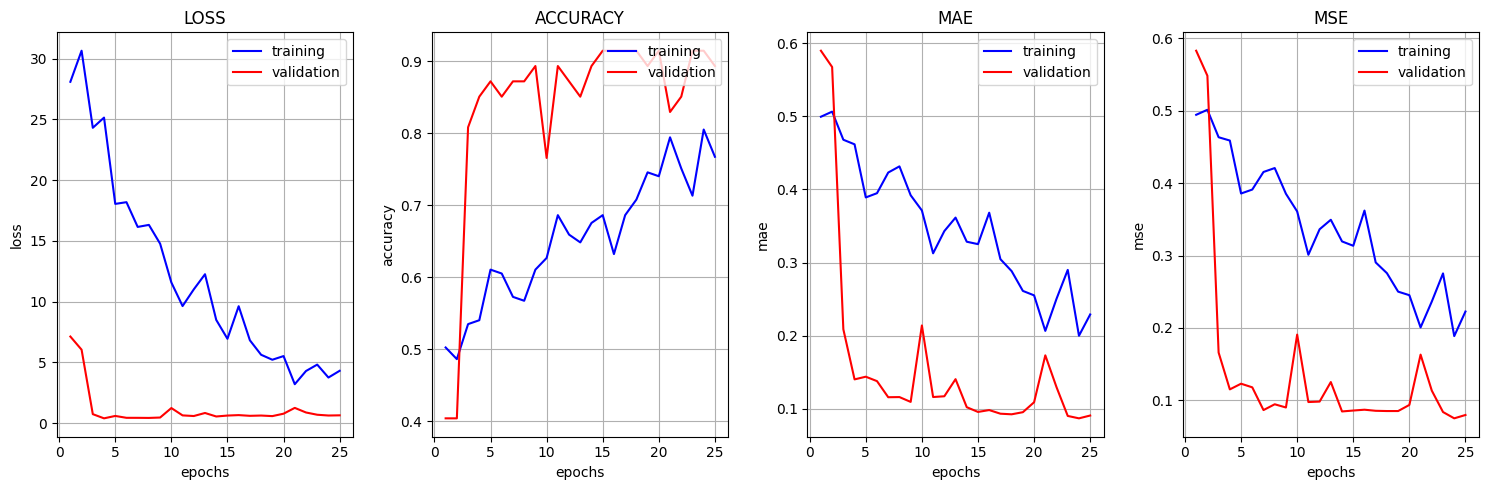

In [26]:
full_plot_model_metrics(history)

In [27]:
def plot_model_metrics(history):
    # разделяем данные из истории обучения на треноровочные и тестовые
    metrics = list(history.history.items())[:len(history.history.items())//2+1]
    val_metrics = list(history.history.items())[len(history.history.items())//2:]

    plt.figure(figsize=(30, 5))

    for i, metric, val_metric in zip(range(len(history.history.keys())), metrics, val_metrics):
        metric_mean = np.mean(metric[1][-3:])
        val_metric_mean = np.mean(val_metric[1][-3:])

        plt.subplot(1, len(history.history.items()), i+1)
        plt.plot(range(1, len(metric[1])+1), metric[1], c='blue', label='training')
        plt.ylim(0, metric_mean + val_metric_mean)
        plt.plot(range(1, len(val_metric[1])+1), val_metric[1], c='red', label='validation')
        plt.legend(loc='upper right')
        plt.title(metric[0].upper())
        plt.xlabel('epochs')
        plt.ylabel(metric[0])
        plt.tight_layout(h_pad=2, w_pad=2)
        plt.grid(True)

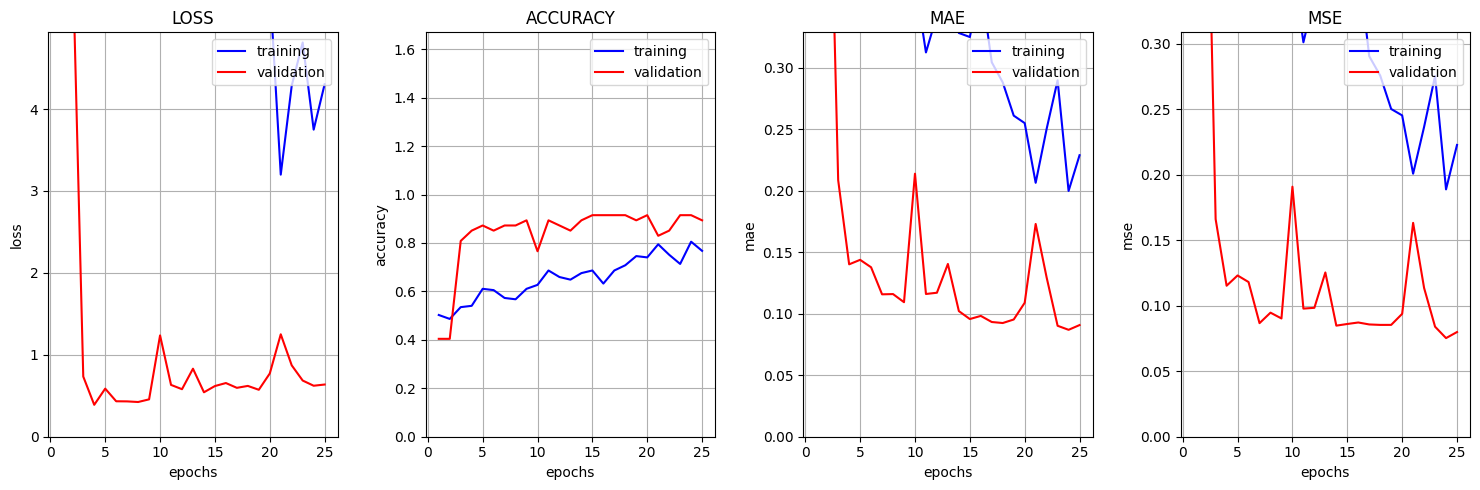

In [28]:
plot_model_metrics(history)

In [29]:
filepath=fr"2 мар., 11.16​(2).wav"
features =  feature_extractor(filepath)
features.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5272\3583983601.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sampling_rate = librosa.load(file_name)
c:\Python\python_3.11.8\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '2 мар., 11.16\u200b(2).wav'

In [ ]:
ipd.Audio(filepath)

In [ ]:
features = features.reshape(1, -1)
features.shape

(1, 40)

In [ ]:
predict = model.predict(features)
predict

1/1 [==============================] - 0s 34ms/step


array([[1.0513866e-15, 1.0000000e+00]], dtype=float32)

In [ ]:
label = np.argmax(predict, axis=1)
res = le.inverse_transform(label)
res

array(['nn_words'], dtype='<U8')